In [1]:
# loading libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
# loading dataset

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv")

In [10]:
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
df.columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df.shape

(613, 13)

In [15]:
df.duplicated().sum()

0

In [16]:
# There are no duplicate values in the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [18]:
# Our loan_status is the target variable

In [19]:
# We have categorical data like gender, married, education, self_employed, property_area, Loan_Status, credit_history and dependents 

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
category = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History', 'Loan_Amount_Term']

In [22]:
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      488
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     212
Name: count, dtype: int64
Dependents
Dependents
0     344
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     499
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        201
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    421
N    192
Name: count, dtype: int64
Credit_History
Credit_History
1.0    474
0.0     89
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    511
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


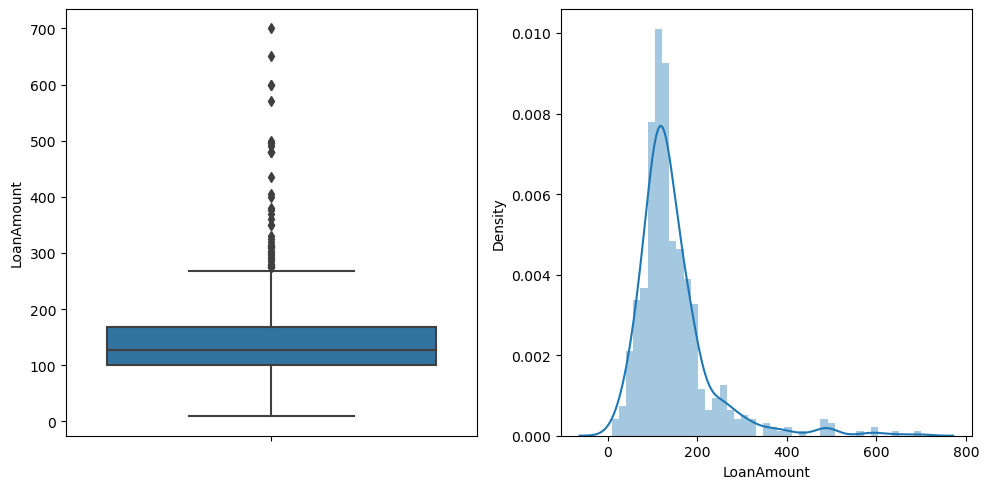

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'LoanAmount', data = df)
plt.ylabel('LoanAmount')
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.tight_layout()
plt.show()

In [24]:
print("Mean of LoanAmount:" , df['LoanAmount'].mean())
print("Median of LoanAmount:" , df['LoanAmount'].median())

Mean of LoanAmount: 146.41216216216216
Median of LoanAmount: 128.0


In [25]:
# Since the mean is greater than the median
# We can see the outliers in our boxplot

In [26]:
# Now we are going to impute the missing values in the LoanAmount data with median values

In [27]:
#Imputation of missing values for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Loan_Status'].fillna(df['Loan_Status'].mode()[0], inplace = True)

# Imputation of Missing values for numerical features
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
# Now There are no null values in the datsets  

In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,145.781403,342.381729,0.854812
std,6114.004114,2927.903583,84.172857,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
# In ApplicantIncome, CoapplicantIncome Standarad Deviation value is greater than mean value
# So which means that our data is spread and skewed

In [32]:
#Looking at ApplicantIncome , LoanAmount and CoapplicantIncome 75% percentile and Max data we can see that outliers are present

In [33]:
# Minimum tenure  of loan is 12 months 
# Maximum tenure of loan is 480 months
# Maximum income of applicant is 81000 and minimum income of applicant is 150

In [34]:
# Now it's time for encoding the categorical data

In [35]:
category = ['Gender', 'Married' , 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


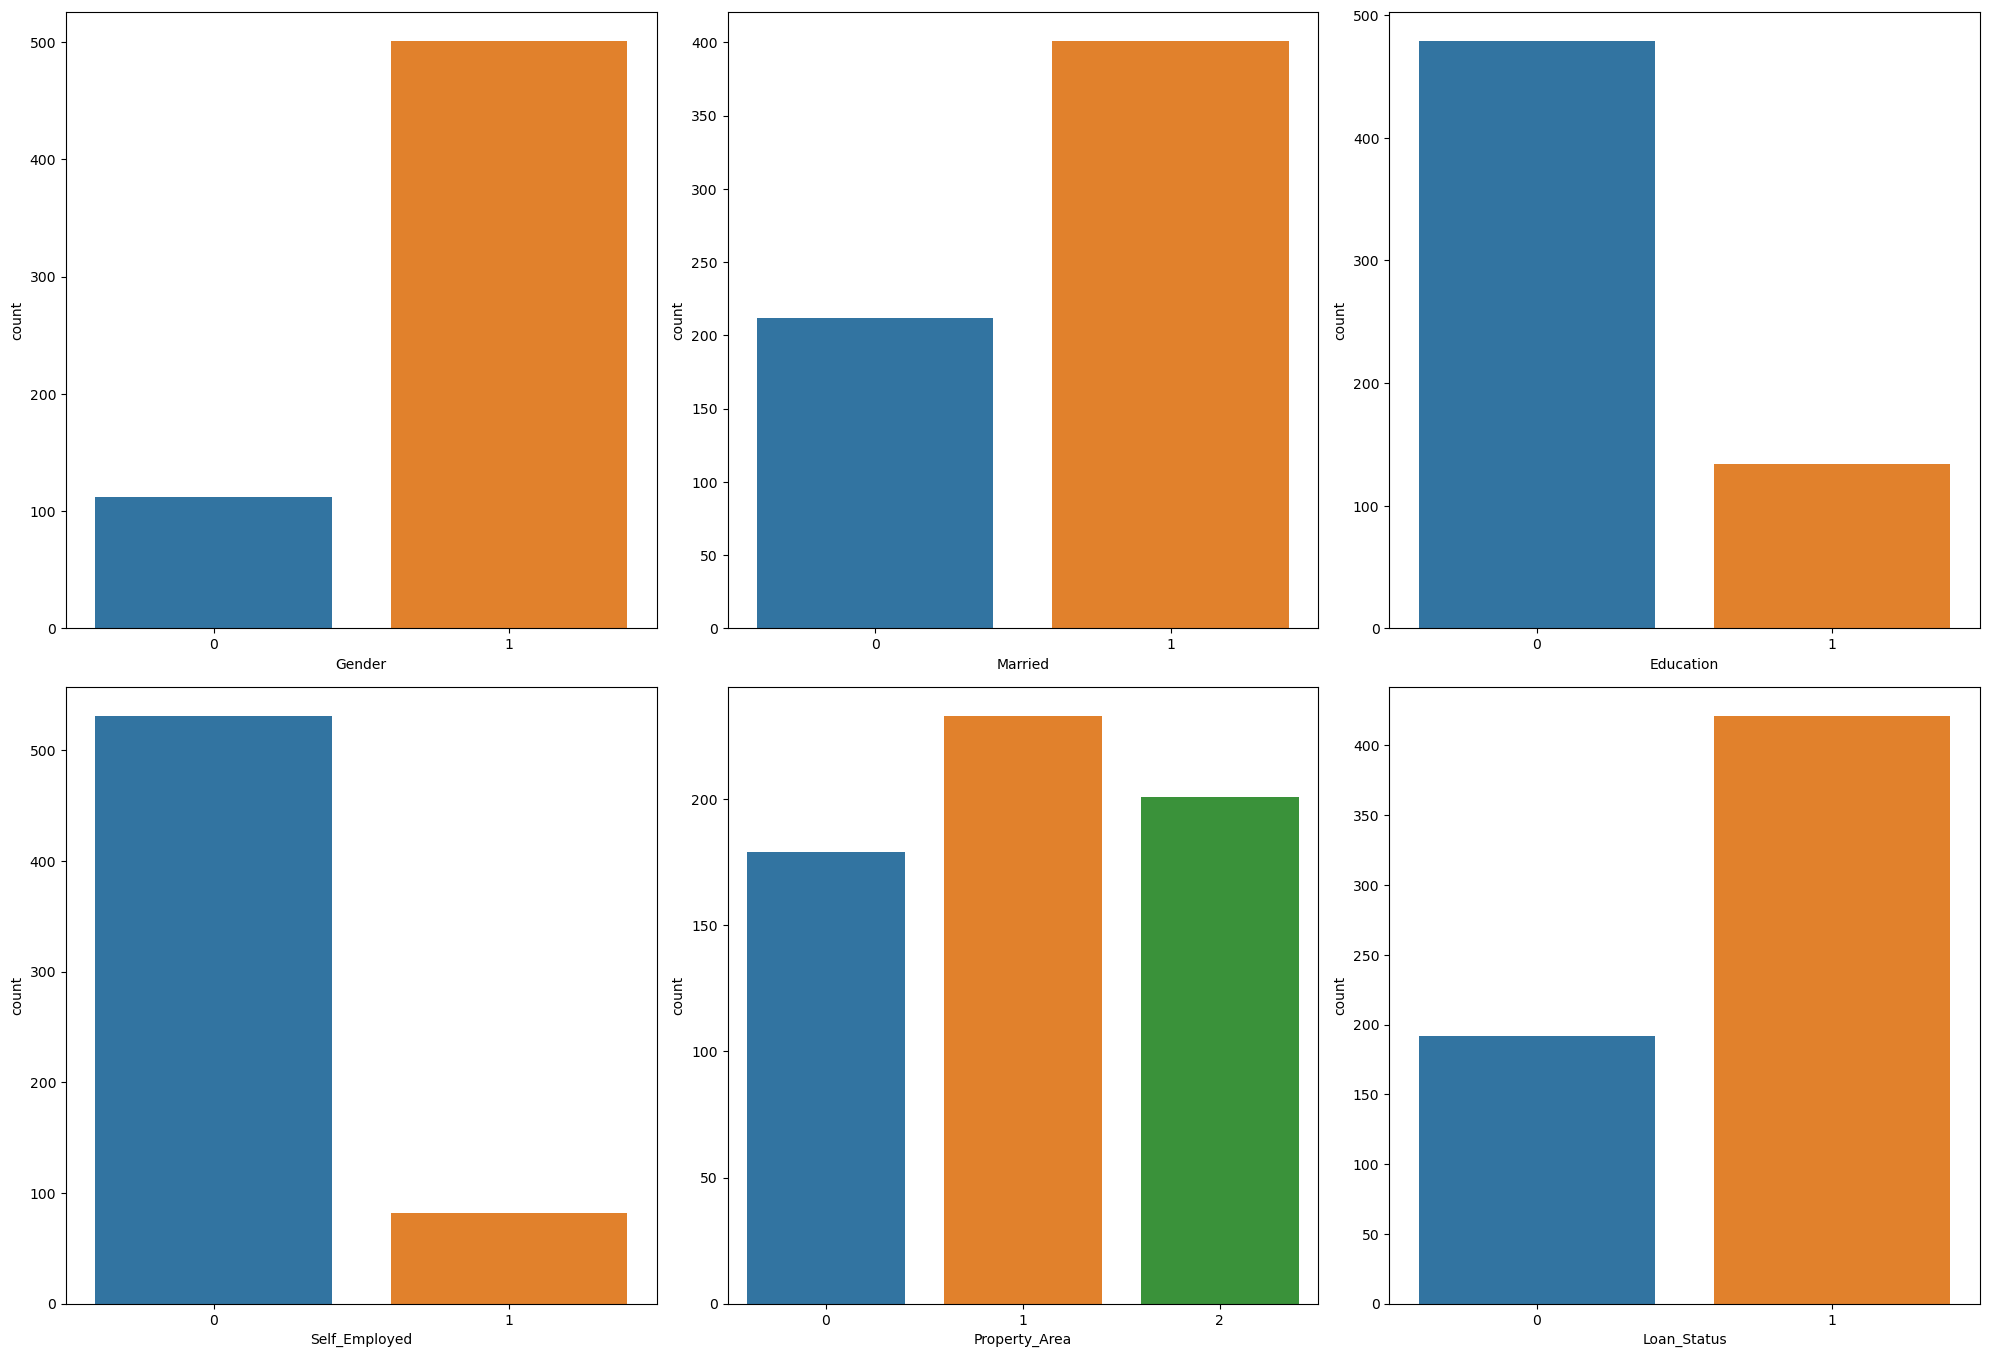

In [37]:
plt.figure(figsize=(20,20))
plot_number = 1
for i in category:
    if plot_number<=9:
        ax = plt.subplot(3,3,plot_number)
        sns.countplot(x = df[i])
        plt.xlabel(i)
    plot_number+=1
plt.tight_layout()
plt.show() 

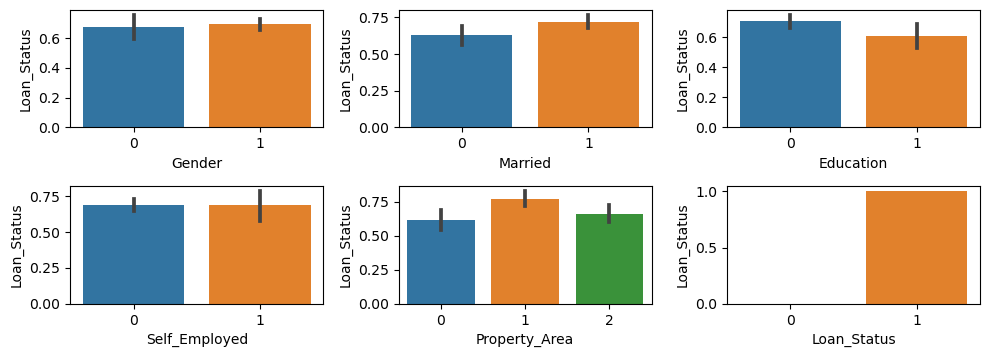

In [38]:
plt.figure(figsize=(10,5))
plot_number = 1
for i in category:
    if plot_number<=9:
        ax = plt.subplot(3,3,plot_number)
        sns.barplot(x = i, y = 'Loan_Status', data = df)
        plt.xlabel(i)
    plot_number+=1
plt.tight_layout()
plt.show()    

In [39]:
Numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

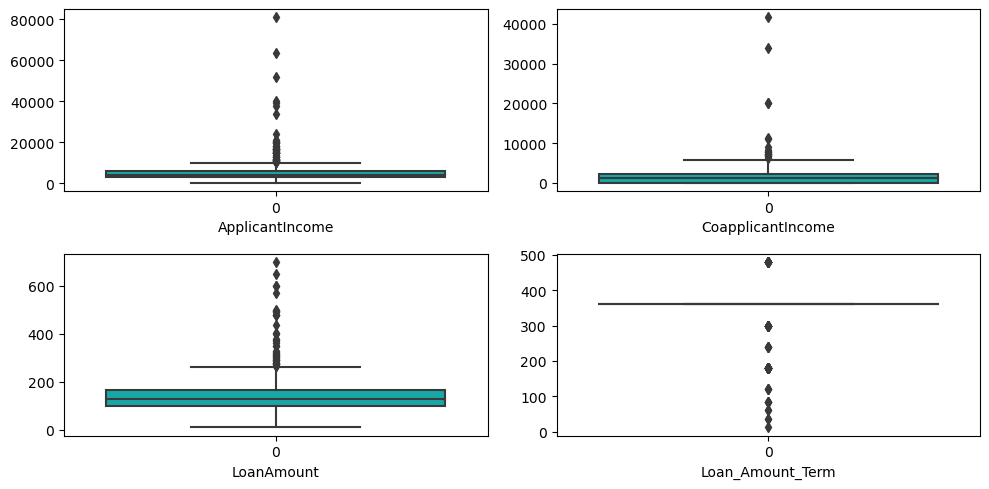

In [40]:
plt.figure(figsize=(10,5))
plot_number = 1
for i in Numerical_features:
    if plot_number<=4:
        ax = plt.subplot(2,2,plot_number)
        sns.boxplot(df[i],color = 'c')
        plt.xlabel(i)
    plot_number+=1
plt.tight_layout()
plt.show()

In [41]:
# From Boxplot we can see that there are no outliers in our data

In [42]:
# Dropping Unecessary columns from our dataset

In [43]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [44]:
df['Dependents'].value_counts()

Dependents
0     359
1     102
2     101
3+     51
Name: count, dtype: int64

In [45]:
df['Dependents'] = df.Dependents.map({'0':0, '1':1, '2':2, '3+':3})

In [46]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [47]:
# Removing outliers using Z - Scores

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df_1 = df[(z<3).all(axis = 1)]

In [49]:
df.shape

(613, 12)

In [50]:
df_1.shape

(576, 12)

In [51]:
# We have remove outliers in our datasets 

In [52]:
# Skewness of fetaure

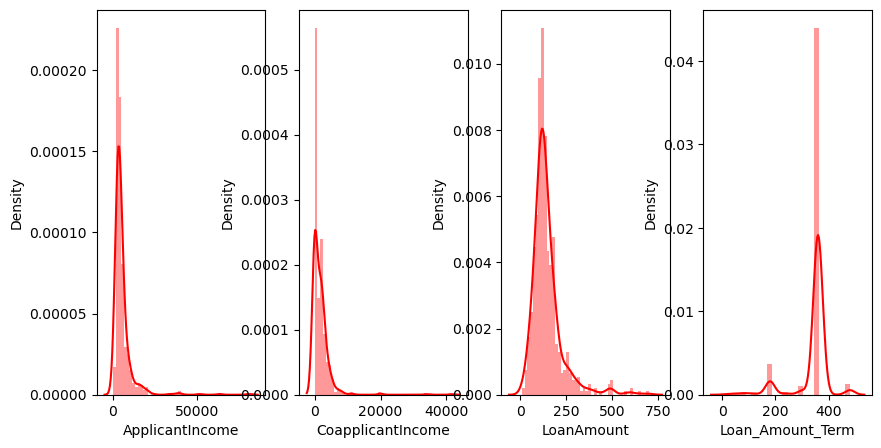

In [53]:
plt.figure(figsize=(10,5))
plot_number = 1
for col in Numerical_features:
    if plot_number<=4:
        plt.subplot(1,4,plot_number)
        sns.distplot(df[col], color = 'r')
        plt.xlabel(col)
    plot_number+=1    
plt.show()    

In [54]:
df_1.skew()

Gender              -1.620181
Married             -0.635432
Dependents           1.049515
Education            1.303909
Self_Employed        2.249864
ApplicantIncome      2.149534
CoapplicantIncome    1.348577
LoanAmount           1.149904
Loan_Amount_Term    -2.096104
Credit_History      -1.973183
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

In [55]:
# For Numerical Features its within permissable limit 

In [56]:
df = df_1.copy()

In [57]:
# Coorelation

In [58]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.380814,0.188884,0.046166,-0.005894,0.026622,0.191417,0.158573,-0.105200,0.012830,-0.027398,0.016863
Married,0.380814,1.000000,0.328869,0.023579,-0.016708,-0.007636,0.235817,0.164323,-0.127012,0.020334,0.013538,0.090795
Dependents,0.188884,0.328869,1.000000,0.069182,0.044090,0.077774,-0.027331,0.135454,-0.087143,-0.019775,0.003875,0.018730
Education,0.046166,0.023579,0.069182,1.000000,-0.007500,-0.166089,-0.038625,-0.149532,-0.090333,-0.074853,-0.067547,-0.092087
Self_Employed,-0.005894,-0.016708,0.044090,-0.007500,1.000000,0.250995,-0.040172,0.121493,-0.032767,-0.016117,-0.027482,-0.026095
ApplicantIncome,0.026622,-0.007636,0.077774,-0.166089,0.250995,1.000000,-0.220551,0.439684,-0.052271,0.036385,-0.004498,-0.005470
CoapplicantIncome,0.191417,0.235817,-0.027331,-0.038625,-0.040172,-0.220551,1.000000,0.312436,-0.058422,-0.010485,-0.091850,0.046059
LoanAmount,0.158573,0.164323,0.135454,-0.149532,0.121493,0.439684,0.312436,1.000000,0.039751,0.009791,-0.078707,-0.030029
Loan_Amount_Term,-0.105200,-0.127012,-0.087143,-0.090333,-0.032767,-0.052271,-0.058422,0.039751,1.000000,0.027230,-0.057574,-0.020569
Credit_History,0.012830,0.020334,-0.019775,-0.074853,-0.016117,0.036385,-0.010485,0.009791,0.027230,1.000000,-0.009026,0.560753


In [59]:
# HEATMAP 

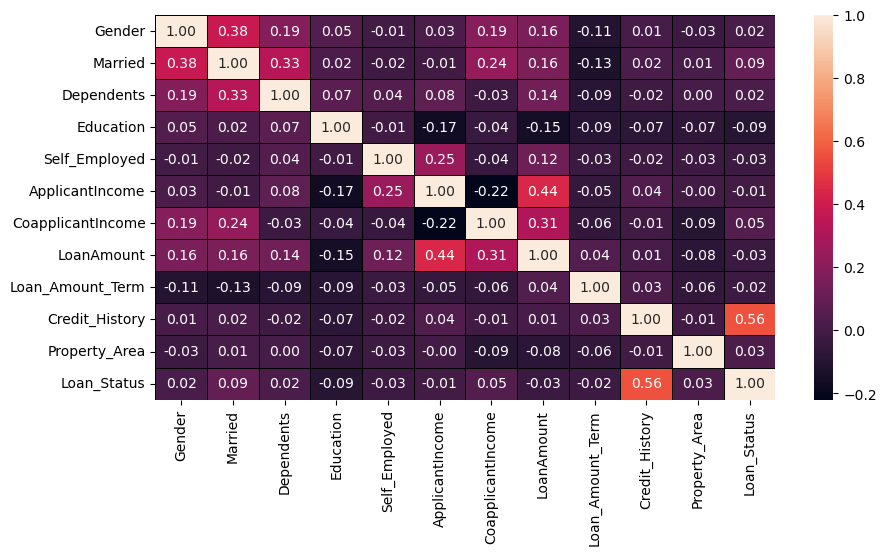

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', fmt = '.2f')
plt.xticks()
plt.yticks()
plt.show()

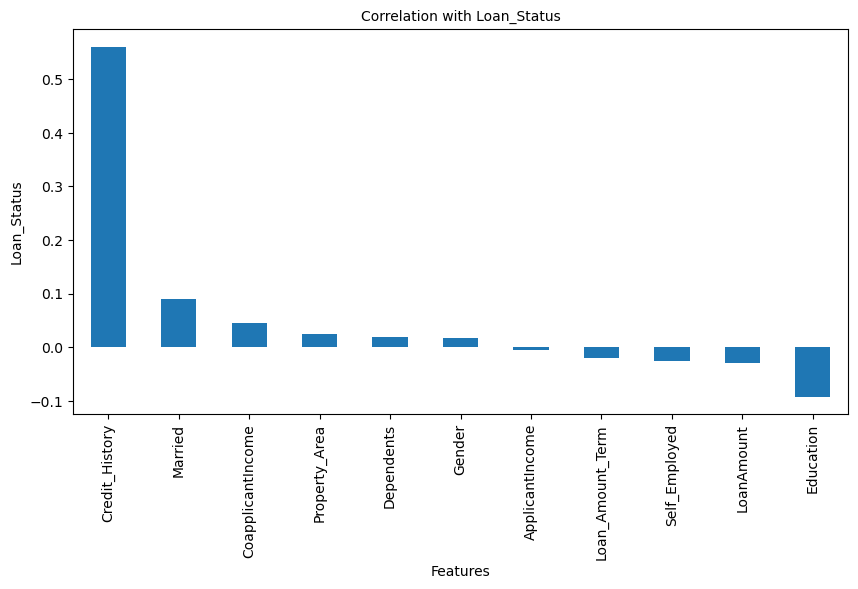

In [61]:
plt.figure(figsize=(10,5))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Loan_Status', fontsize = 10)
plt.title('Correlation with Loan_Status', fontsize = 10)
plt.show()

In [62]:
# Most of the features are poorly or moderately correlated with the 'Loan_Status' feature

In [63]:
# Maximum correlation exists between 'Credit_History' and 'Loan_Status' i.e. 0.56 

In [64]:
# Checking Multicollinearity between features using variance_inflation_factor

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,Features,VIF
0,Gender,6.204537
1,Married,3.838147
2,Dependents,1.787483
3,Education,1.329832
4,Self_Employed,1.227428
5,ApplicantIncome,5.450415
6,CoapplicantIncome,2.513584
7,LoanAmount,11.321532
8,Loan_Amount_Term,13.224125
9,Credit_History,9.519666


In [66]:
#All Features are within permissable limit of 10

In [67]:
# Therefore no need to worry about Multicollinearity

In [68]:
df.Loan_Status.value_counts()

Loan_Status
1    397
0    179
Name: count, dtype: int64

In [69]:
# As Target Variable is imbalanced in nature so we will need to balance target variable 

In [73]:
# Balancing using RandomOverSampler

In [72]:
from imblearn.over_sampling import RandomOverSampler

In [74]:
x = df.drop('Loan_Status', axis = 1)

In [75]:
y = df['Loan_Status']

In [76]:
ros = RandomOverSampler()
x,y = ros.fit_resample(x,y)

In [77]:
y.value_counts()

Loan_Status
0    397
1    397
Name: count, dtype: int64

In [78]:
# We have successfully balanced our class imbalance problem and now all the categories are equally distributed 
# ML Model can't be biased towards one category

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 78)

In [85]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((595, 11), (199, 11), (595,), (199,))

In [95]:
models = {'LogisticRegression': LogisticRegression(),'SVC': SVC(),'RandomForestClassifier': RandomForestClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),'KNeighborsClassifier': KNeighborsClassifier()}

LogisticRegression()
Accuracy Score: 0.7788944723618091
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.62      0.73        95
           1       0.73      0.92      0.81       104

    accuracy                           0.78       199
   macro avg       0.80      0.77      0.77       199
weighted avg       0.80      0.78      0.77       199

Confusion Matrix: [[59 36]
 [ 8 96]]


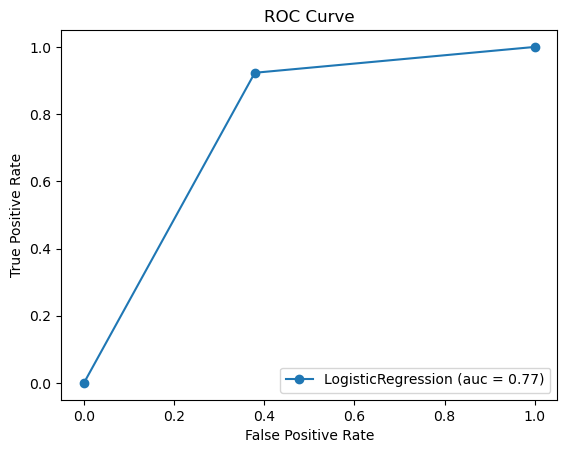

SVC()
Accuracy Score: 0.7537688442211056
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.60      0.70        95
           1       0.71      0.89      0.79       104

    accuracy                           0.75       199
   macro avg       0.77      0.75      0.75       199
weighted avg       0.77      0.75      0.75       199

Confusion Matrix: [[57 38]
 [11 93]]


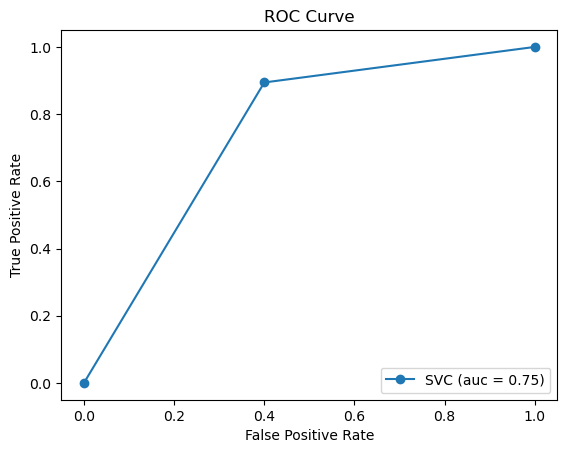

RandomForestClassifier()
Accuracy Score: 0.9396984924623115
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.95      0.93      0.94       104

    accuracy                           0.94       199
   macro avg       0.94      0.94      0.94       199
weighted avg       0.94      0.94      0.94       199

Confusion Matrix: [[90  5]
 [ 7 97]]


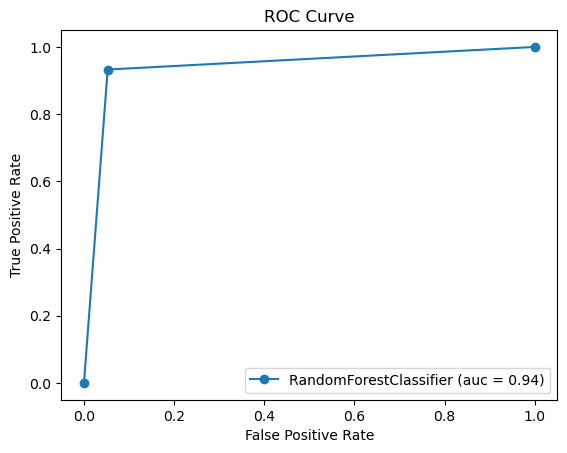

DecisionTreeClassifier()
Accuracy Score: 0.8693467336683417
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87        95
           1       0.91      0.84      0.87       104

    accuracy                           0.87       199
   macro avg       0.87      0.87      0.87       199
weighted avg       0.87      0.87      0.87       199

Confusion Matrix: [[86  9]
 [17 87]]


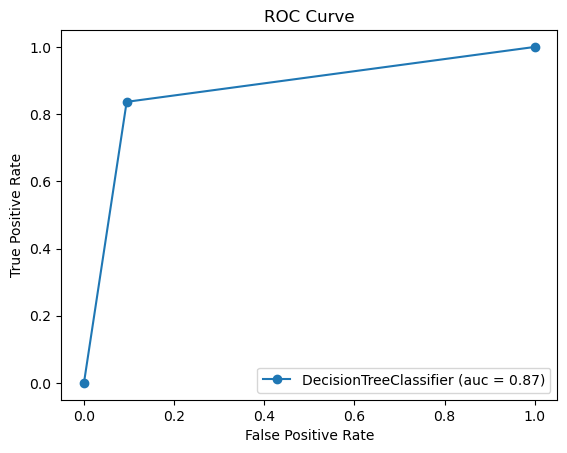

KNeighborsClassifier()
Accuracy Score: 0.7537688442211056
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.73      0.74        95
           1       0.76      0.78      0.77       104

    accuracy                           0.75       199
   macro avg       0.75      0.75      0.75       199
weighted avg       0.75      0.75      0.75       199

Confusion Matrix: [[69 26]
 [23 81]]


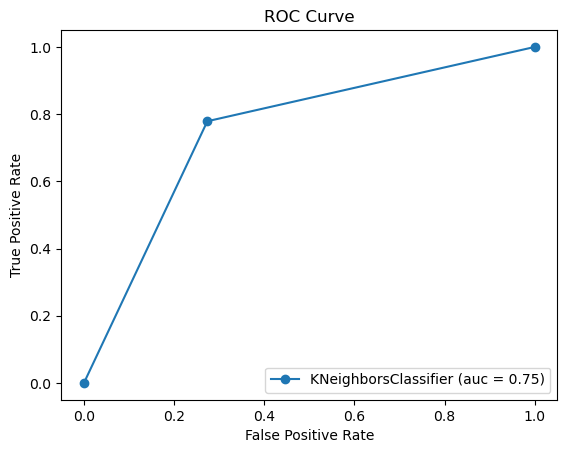

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for model in models.values():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    #Calculate ROC curve and AUC Score
    fpr, tpr, thresh = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    #Plot ROC curve
    plt.plot(fpr, tpr, marker = 'o', label = '%s (auc = %0.2f)' % (model.__class__.__name__,auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(prop = {'size': 10}, loc = 'lower right')
    plt.show()
    print('===========================================================')

In [104]:
# Random Forest Classifier performs best among all the models with good accuracy score and Maximum F1 score out there

In [99]:
# Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score
for model in models.values():
    scores = cross_val_score(model, x_scaled, y, cv = 10)
    print(model)
    print('Cross Validation Scores:', scores)
    print('Average Cross Validation Score:', scores.mean())
    print('Standard Deviation:', scores.std())
    print('===========================================================')

LogisticRegression()
Cross Validation Scores: [0.725      0.6375     0.75       0.7375     0.74683544 0.72151899
 0.6835443  0.72151899 0.62025316 0.70886076]
Average Cross Validation Score: 0.705253164556962
Standard Deviation: 0.042414732980254076
SVC()
Cross Validation Scores: [0.725      0.725      0.7625     0.725      0.72151899 0.78481013
 0.74683544 0.75949367 0.67088608 0.79746835]
Average Cross Validation Score: 0.7418512658227848
Standard Deviation: 0.034644691031209575
RandomForestClassifier()
Cross Validation Scores: [0.9        0.8625     0.9125     0.8375     0.91139241 0.94936709
 0.94936709 0.88607595 0.96202532 0.92405063]
Average Cross Validation Score: 0.9094778481012659
Standard Deviation: 0.03767480820507964
DecisionTreeClassifier()
Cross Validation Scores: [0.7875     0.8375     0.9        0.8        0.84810127 0.92405063
 0.94936709 0.88607595 0.92405063 0.91139241]
Average Cross Validation Score: 0.8768037974683545
Standard Deviation: 0.052719049587342956
KNeig

In [106]:
# After performing cross validation Random Forest Classifier performs best with good Average Cross Validation Score along with 
# Low Standarad deviation  and Now WE will apply Hyperparameter tuning to Random Forest Classifier to choose as Best Model

In [107]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {'bootstrap': [True], 'max_depth':[5,10,20,40,50,60],
            'max_features':['auto', 'log2'], 'criterion':['gini', 'entropy'],
            'n_estimators':[5,10,15,25,50,60,70]}

In [112]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, verbose = 10)
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [113]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 70}

In [117]:
# FINAL MODEL

In [114]:
final_model = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_depth = 40, max_features = 'log2', n_estimators = 70)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.914572864321608


In [118]:
#ROC Curve

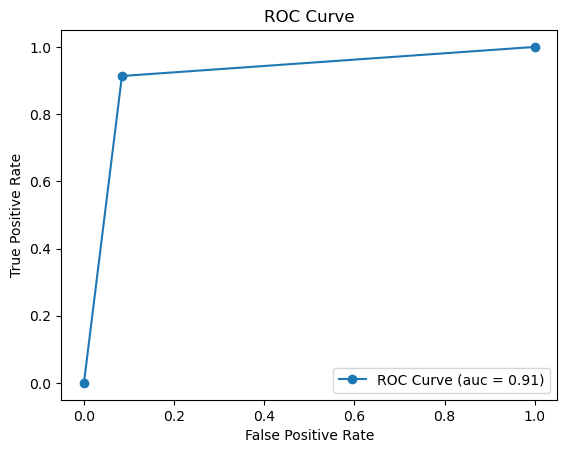

AUC Score: 0.9146255060728744


In [116]:
fpr, tpr, thresh = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
#Plot ROC curve
plt.plot(fpr, tpr, marker = 'o', label = 'ROC Curve (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

from sklearn.metrics import roc_curve
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)

In [119]:
# SAVING THE MODEL

In [120]:
import pickle
filename = 'Loan Application Status Prediction.pkl'
pickle.dump(final_model, open(filename, 'wb'))